In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part I Basic features from listings

In [2]:
#import data
df1 = pd.read_csv('NYC_listings_202203.csv')
df1['Quarter']=1
df2 = pd.read_csv('NYC_listings_202206.csv')
df2['Quarter']=2
df3 = pd.read_csv('NYC_listings_202109.csv')
df3['Quarter']=3
df4 = pd.read_csv('NYC_listings_202112.csv')
df4['Quarter']=4
nyc_data=pd.concat([df1, df2, df3, df4])

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(nyc_data)

150241

In [4]:
nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Quarter
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.32,3,334,0,NaN,1
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.32,2,365,0,NaN,1
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,201,1,NaN,1
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,520,2022-02-18,3.33,1,154,46,NaN,1
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.77,1,0,0,NaN,1


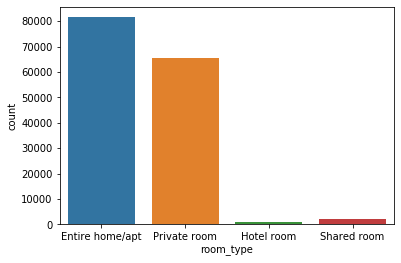

In [5]:
ax = sns.countplot(x="room_type", data=nyc_data)  

In [6]:
nyc_data.isnull().sum()

id                                     0
name                                  54
host_id                                0
host_name                            298
neighbourhood_group                    0
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        35723
reviews_per_month                  35723
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           150235
Quarter                                0
dtype: int64

Text(0.5, 1.0, 'Price Distribution')

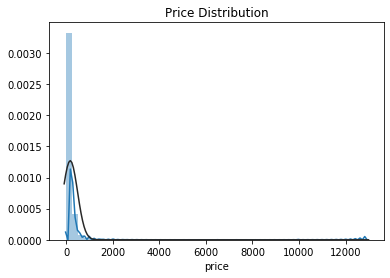

In [7]:
from scipy.stats import norm
sns.distplot(nyc_data['price'], fit=norm)
plt.title("Price Distribution")
# very skewed 

In [8]:
#log transformation
nyc_data['price_log'] = np.log(nyc_data.price+1)


Text(0.5, 1.0, 'Price Distribution(Log)')

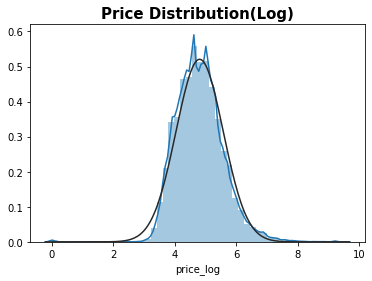

In [9]:
sns.distplot(nyc_data['price_log'], fit=norm)
plt.title("Price Distribution(Log)",size=15, weight='bold')

In [10]:
nyc_df = nyc_data.drop(columns=['name','id' ,'host_id','host_name','last_review','price','license'])
nyc_df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 35723
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
Quarter                               0
price_log                             0
dtype: int64

In [11]:
#fill nan with mean for reviews_per_month
nyc_df['reviews_per_month'].fillna(nyc_df['reviews_per_month'].mean(), inplace=True)
nyc_df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
Quarter                           0
price_log                         0
dtype: int64

In [12]:
corr=nyc_df.corr(method='pearson')
corr

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Quarter,price_log
latitude,1.000000,0.054106,0.034251,-0.044112,-0.029360,0.071173,0.003078,-0.044873,0.003103,0.037522
longitude,0.054106,1.000000,-0.090627,0.057883,0.060161,-0.064983,0.101372,0.058232,-0.020473,-0.262788
minimum_nights,0.034251,-0.090627,1.000000,-0.142382,-0.135987,0.087464,-0.034833,-0.196726,0.022710,-0.070126
number_of_reviews,-0.044112,0.057883,-0.142382,1.000000,0.329583,-0.103943,0.098389,0.583250,-0.015998,-0.017080
reviews_per_month,-0.029360,0.060161,-0.135987,0.329583,1.000000,-0.001567,0.126116,0.587209,0.069040,0.028777
calculated_host_listings_count,0.071173,-0.064983,0.087464,-0.103943,-0.001567,1.000000,0.186644,-0.044776,0.013158,0.016196
availability_365,0.003078,0.101372,-0.034833,0.098389,0.126116,0.186644,1.000000,0.131279,0.016346,0.135438
number_of_reviews_ltm,-0.044873,0.058232,-0.196726,0.583250,0.587209,-0.044776,0.131279,1.000000,-0.043189,0.040305
Quarter,0.003103,-0.020473,0.022710,-0.015998,0.069040,0.013158,0.016346,-0.043189,1.000000,-0.005956
price_log,0.037522,-0.262788,-0.070126,-0.017080,0.028777,0.016196,0.135438,0.040305,-0.005956,1.000000


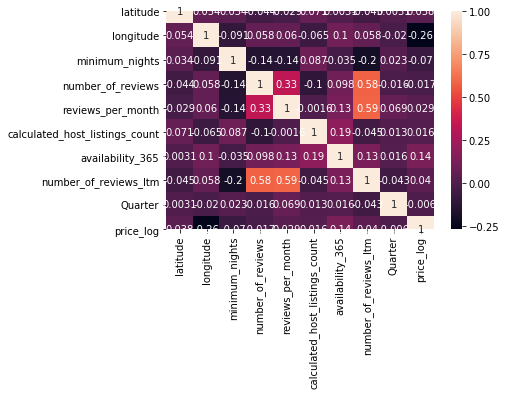

In [13]:
ax = sns.heatmap(corr,annot=True)


In [14]:
#convert category data into series
nyc_df['neighbourhood_group']= nyc_df['neighbourhood_group'].astype("category").cat.codes
nyc_df['neighbourhood'] = nyc_df['neighbourhood'].astype("category").cat.codes
nyc_df['room_type'] = nyc_df['room_type'].astype("category").cat.codes
nyc_df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Quarter,price_log
0,2,144,40.753560,-73.985590,0,30,48,0.320000,3,334,0,1,5.017280
1,1,12,40.685350,-73.955120,2,30,50,0.320000,2,365,0,1,4.110874
2,1,213,40.662650,-73.994540,0,5,2,0.020000,1,201,1,1,5.620401
3,2,144,40.764570,-73.983170,2,2,520,3.330000,1,154,46,1,4.234107
4,2,225,40.803800,-73.967510,2,2,118,0.770000,1,0,0,1,4.330733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,4,177,40.632222,-74.136715,2,1,0,1.345447,6,359,0,4,4.382027
38273,4,177,40.630502,-74.136142,2,1,0,1.345447,6,359,0,4,4.343805
38274,2,144,40.753887,-73.980536,2,1,0,1.345447,13,11,0,4,4.762174
38275,2,144,40.755569,-73.981976,2,1,0,1.345447,13,3,0,4,4.672829


In [15]:
X= nyc_df.iloc[:,:-1]
y=nyc_df.iloc[:,-1]

In [16]:
X

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Quarter
0,2,144,40.753560,-73.985590,0,30,48,0.320000,3,334,0,1
1,1,12,40.685350,-73.955120,2,30,50,0.320000,2,365,0,1
2,1,213,40.662650,-73.994540,0,5,2,0.020000,1,201,1,1
3,2,144,40.764570,-73.983170,2,2,520,3.330000,1,154,46,1
4,2,225,40.803800,-73.967510,2,2,118,0.770000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
38272,4,177,40.632222,-74.136715,2,1,0,1.345447,6,359,0,4
38273,4,177,40.630502,-74.136142,2,1,0,1.345447,6,359,0,4
38274,2,144,40.753887,-73.980536,2,1,0,1.345447,13,11,0,4
38275,2,144,40.755569,-73.981976,2,1,0,1.345447,13,3,0,4


In [17]:
y

0        5.017280
1        4.110874
2        5.620401
3        4.234107
4        4.330733
           ...   
38272    4.382027
38273    4.343805
38274    4.762174
38275    4.672829
38276    6.536692
Name: price_log, Length: 150241, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_t,y,test_size=0.2, random_state=42)

In [20]:
## liner regression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [21]:
coeff_df_lr = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'],ascending=False)
coeff_df_lr

,Coefficient
availability_365,0.120302
neighbourhood_group,0.037103
latitude,0.037031
neighbourhood,0.036026
number_of_reviews_ltm,0.021175
reviews_per_month,0.013703
Quarter,-0.003677
calculated_host_listings_count,-0.024622
number_of_reviews,-0.048942
minimum_nights,-0.068314


In [22]:
pred_lr = lin_reg.predict(X_test)

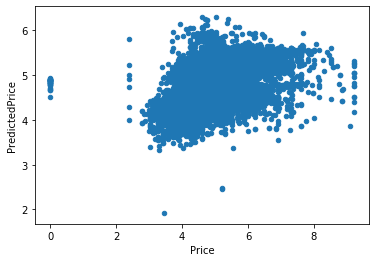

In [23]:
pd.DataFrame({'Price': y_test, 'PredictedPrice': pred_lr}).plot.scatter(x='Price', y='PredictedPrice')

In [24]:
#Lasso Regression 
lasso = Lasso()
grid = { 
    'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])
}
CV_lasso = GridSearchCV(estimator=lasso, scoring='neg_mean_squared_error', param_grid=grid, cv= 5)
CV_lasso.fit(X_train, y_train)
CV_lasso.best_params_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17785.513683462457, tolerance: 5.622061687024271
  positive)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_desce

{'alpha': 0.0}

In [25]:
# Ridge Regression
ridge = Ridge()
grid = { 
    'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])
}
CV_ridge = GridSearchCV(estimator=ridge, scoring='neg_mean_squared_error',param_grid=grid, cv= 5)
CV_ridge.fit(X_train, y_train)
CV_ridge.best_params_

{'alpha': 1.0}

In [26]:
#random forest
grid = { 
    'max_depth' : [3,4,5,6,7]
}
## show start time

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)
CV_rfr.best_params_

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

{'max_depth': 7}

In [27]:
#prediction

##Linear Regression
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(X_train, y_train)
lr_pred_train= lin_reg.predict(X_train)
lr_pred_test= lin_reg.predict(X_test)

#Lasso 
lasso = Lasso(alpha = 0)
lasso.fit(X_train, y_train)
lasso_pred_train= lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test) 

#Ridge 
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)  
ridge_pred_train= ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test) 

#Random Forest
rdf = RandomForestRegressor(max_depth=7)
rdf.fit(X_train, y_train) 
rdf_pred_train= rdf.predict(X_train)
rdf_pred_test = rdf.predict(X_test) 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22336.679266903266, tolerance: 7.04092004378813
  positive)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
important_features_dict = {}
for idx, val in enumerate(rdf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
for i in important_features_list:
    print(i,X.columns[i],important_features_dict[i])

4 room_type 0.5797646250861114
3 longitude 0.15129269289820796
8 calculated_host_listings_count 0.07033616897306823
2 latitude 0.0646401727386229
9 availability_365 0.05310595852523968
5 minimum_nights 0.04706772379308536
7 reviews_per_month 0.011435446089215503
1 neighbourhood 0.00781024054135829
6 number_of_reviews 0.007799282284055503
10 number_of_reviews_ltm 0.005460345727469546
11 Quarter 0.0010054709566667483
0 neighbourhood_group 0.0002818723868988956


In [29]:
def print_evaluate(Model, tt, Price, PredictedPrice):  
    mae = metrics.mean_absolute_error(Price, PredictedPrice)
    mse = metrics.mean_squared_error(Price, PredictedPrice)
    rmse = np.sqrt(metrics.mean_squared_error(Price, PredictedPrice))
    r2_square = metrics.r2_score(Price, PredictedPrice)
    print(Model+' '+tt)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [30]:
print_evaluate('Linear_Regression', 'test', y_test,lr_pred_test)
print_evaluate('Linear_Regression', 'train', y_train,lr_pred_train)

print_evaluate('Lasso', 'test',y_test, lasso_pred_test)
print_evaluate('Lasso', 'train',y_train, lasso_pred_train)

print_evaluate('Ridge', 'test',y_test, ridge_pred_test)
print_evaluate('Ridge', 'train',y_train, ridge_pred_train)

print_evaluate('Radnom Forest', 'test',y_test, rdf_pred_test)
print_evaluate('Radnom Forest', 'train',y_train, rdf_pred_train)

Linear_Regression test
MAE: 0.43822728999736815
MSE: 0.3799429645726343
RMSE: 0.6163951367204598
R2 Square 0.3572984052586903
__________________________________
Linear_Regression train
MAE: 0.4373029037649969
MSE: 0.37168329451050447
RMSE: 0.6096583424431298
R2 Square 0.3655181672852579
__________________________________
Lasso test
MAE: 0.4382272899973681
MSE: 0.3799429645726343
RMSE: 0.6163951367204598
R2 Square 0.3572984052586903
__________________________________
Lasso train
MAE: 0.4373029037649967
MSE: 0.3716832945105044
RMSE: 0.6096583424431297
R2 Square 0.365518167285258
__________________________________
Ridge test
MAE: 0.43822730693642264
MSE: 0.3799429470824476
RMSE: 0.6163951225329801
R2 Square 0.3572984348446333
__________________________________
Ridge train
MAE: 0.437302967931395
MSE: 0.37168329452432236
RMSE: 0.6096583424544623
R2 Square 0.36551816726166997
__________________________________
Radnom Forest test
MAE: 0.3717444879578224
MSE: 0.27230198616949347
RMSE: 0.521825

In [31]:
#polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

In [32]:
#prediction

##Linear Regression
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(X_train_p, y_train)
lr_pred= lin_reg.predict(X_test_p)

#Lasso 
lasso = Lasso(alpha = 0)
lasso.fit(X_train_p, y_train)
lasso_pred = lasso.predict(X_test_p) 

#Ridge 
ridge = Ridge(alpha = 1)
ridge.fit(X_train_p, y_train)             
ridge_pred = ridge.predict(X_test_p) 

#Random Forest
rdf = RandomForestRegressor(max_depth=7)
rdf.fit(X_train_p, y_train) 
rdf_pred= rdf.predict(X_test_p)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20611.933827934357, tolerance: 7.04092004378813
  positive)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
print_evaluate('Linear_Regression', 'test', y_test,lr_pred)
print_evaluate('Lasso', 'test',y_test, lasso_pred)
print_evaluate('Ridge', 'test',y_test, ridge_pred)
print_evaluate('Radnom Forest', 'test',y_test, rdf_pred)

Linear_Regression test
MAE: 0.4174345828896623
MSE: 0.3521723818805783
RMSE: 0.5934411359861889
R2 Square 0.4042743975715253
__________________________________
Lasso test
MAE: 0.4174345828288402
MSE: 0.35217238163094383
RMSE: 0.593441135775861
R2 Square 0.4042743979938005
__________________________________
Ridge test
MAE: 0.41743444788800305
MSE: 0.3521721186119822
RMSE: 0.5934409141708905
R2 Square 0.40427484290980586
__________________________________
Radnom Forest test
MAE: 0.3700473439487472
MSE: 0.267678736403528
RMSE: 0.5173767837886891
R2 Square 0.5472016412821419
__________________________________


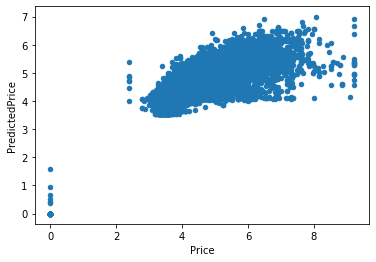

In [34]:
pd.DataFrame({'Price': y_test, 'PredictedPrice': rdf_pred}).plot.scatter(x='Price', y='PredictedPrice')

In [35]:
df1.neighbourhood.unique()

array(['Midtown', 'Bedford-Stuyvesant', 'Sunset Park', 'Upper West Side',
       'South Slope', 'Williamsburg', 'East Harlem', 'Fort Greene',
       "Hell's Kitchen", 'Harlem', 'Flatbush', 'East Village',
       'Long Island City', 'Jamaica', 'Greenpoint', 'Lower East Side',
       'Chelsea', 'Upper East Side', 'Prospect Heights', 'Clinton Hill',
       'Washington Heights', 'Kips Bay', 'Carroll Gardens',
       'West Village', 'Park Slope', 'Prospect-Lefferts Gardens',
       'East Flatbush', 'Boerum Hill', 'Sunnyside', 'St. George',
       'Tribeca', 'Ridgewood', 'Mott Haven', 'Morningside Heights',
       'Gowanus', 'Ditmars Steinway', 'Middle Village',
       'Brooklyn Heights', 'Flatiron District', 'Windsor Terrace',
       'Chinatown', 'Greenwich Village', 'Clason Point', 'Eastchester',
       'Crown Heights', 'Nolita', 'Astoria', 'Kingsbridge', 'Bushwick',
       'Forest Hills', 'Murray Hill', 'University Heights', 'Gravesend',
       'Allerton', 'East New York', 'Stuyvesant Tow

# Part II add more detailed features

In [36]:
selected_fields = [
    'id', 
    'host_is_superhost','host_has_profile_pic', 'host_identity_verified', 
    'property_type', 'accommodates', 'maximum_nights', 
    'availability_30', 'availability_60', 'availability_90',
    'instant_bookable']

In [37]:
df1_d = pd.read_csv('listings_202203_detailed.csv')
df1_d=df1_d[selected_fields]

df2_d = pd.read_csv('listings_202206_detailed.csv')
df2_d=df2_d[selected_fields]

df3_d = pd.read_csv('listings_202109_detailed.csv')
df3_d=df3_d[selected_fields]

df4_d = pd.read_csv('listings_202112_detailed.csv')
df4_d=df4_d[selected_fields]


D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
def merge_d(d1, d2):
    
    return d1.merge(d2,how='left', left_on='id', right_on='id')


In [39]:
df1_m=merge_d(df1, df1_d)
df2_m=merge_d(df2, df2_d)
df3_m=merge_d(df3, df3_d)
df4_m=merge_d(df4, df4_d)

In [40]:
df1_m.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,accommodates,maximum_nights,availability_30,availability_60,availability_90,instant_bookable
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,...,f,t,t,Entire rental unit,1,1125,30,60,77,f
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,...,f,t,t,Private room in rental unit,2,730,30,60,90,f
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,...,f,t,t,Entire rental unit,4,1125,0,0,0,f
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,...,f,t,f,Private room in rental unit,2,14,5,7,10,f
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,...,f,t,t,Private room in rental unit,1,14,0,0,0,f


In [41]:
nyc_data_c=pd.concat([df1_m, df2_m, df3_m, df4_m])

In [42]:
nyc_data_c['price_log'] = np.log(nyc_data_c.price+1)

In [43]:
nyc_data_c = nyc_data_c.drop(columns=['name','id' ,'host_id','host_name','last_review','price','license'])


In [44]:
nyc_data_c['reviews_per_month'].fillna(nyc_data_c['reviews_per_month'].mean(), inplace=True)
nyc_data_c.fillna({'host_is_superhost':'f', 'host_has_profile_pic': 'f', 'host_identity_verified': 'f'}, inplace=True)


In [45]:
nyc_data_c.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
Quarter                           0
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
property_type                     0
accommodates                      0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
instant_bookable                  0
price_log                         0
dtype: int64

In [46]:
nyc_data_c.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,host_has_profile_pic,host_identity_verified,property_type,accommodates,maximum_nights,availability_30,availability_60,availability_90,instant_bookable,price_log
0,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,30,48,0.32,3,334,...,t,t,Entire rental unit,1,1125,30,60,77,f,5.017280
1,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,30,50,0.32,2,365,...,t,t,Private room in rental unit,2,730,30,60,90,f,4.110874
2,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,5,2,0.02,1,201,...,t,t,Entire rental unit,4,1125,0,0,0,f,5.620401
3,Manhattan,Midtown,40.76457,-73.98317,Private room,2,520,3.33,1,154,...,t,f,Private room in rental unit,2,14,5,7,10,f,4.234107
4,Manhattan,Upper West Side,40.80380,-73.96751,Private room,2,118,0.77,1,0,...,t,t,Private room in rental unit,1,14,0,0,0,f,4.330733


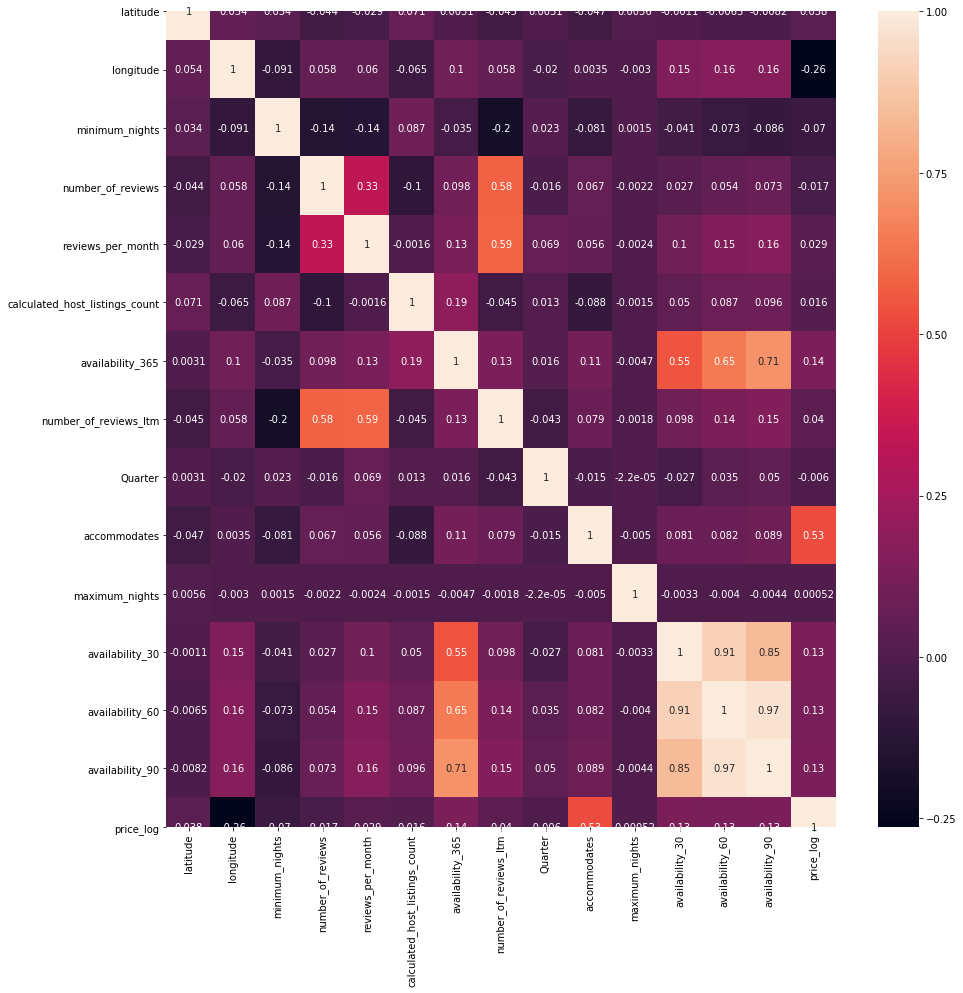

In [47]:
plt.figure(figsize=(15,15))
corr=nyc_data_c.corr(method='pearson')
ax = sns.heatmap(corr,annot=True)

In [48]:
#drop highly correlated columns
nyc_data_c = nyc_data_c.drop(columns=['availability_60','availability_90' ,'availability_365','property_type'])

In [49]:
#convert category data into series
nyc_data_c['neighbourhood_group']= nyc_data_c['neighbourhood_group'].astype("category").cat.codes
nyc_data_c['neighbourhood'] = nyc_data_c['neighbourhood'].astype("category").cat.codes
nyc_data_c['room_type'] = nyc_data_c['room_type'].astype("category").cat.codes
#nyc_data_c['property_type'] = nyc_data_c['property_type'].astype("category").cat.codes
nyc_data_c['host_is_superhost'] = nyc_data_c['host_is_superhost'].astype("category").cat.codes
nyc_data_c['host_has_profile_pic'] = nyc_data_c['host_has_profile_pic'].astype("category").cat.codes
nyc_data_c['host_identity_verified'] = nyc_data_c['host_identity_verified'].astype("category").cat.codes
nyc_data_c['instant_bookable'] = nyc_data_c['instant_bookable'].astype("category").cat.codes
nyc_data_c.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,Quarter,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,maximum_nights,availability_30,instant_bookable,price_log
0,2,144,40.75356,-73.98559,0,30,48,0.32,3,0,1,0,1,1,1,1125,30,0,5.017280
1,1,12,40.68535,-73.95512,2,30,50,0.32,2,0,1,0,1,1,2,730,30,0,4.110874
2,1,213,40.66265,-73.99454,0,5,2,0.02,1,1,1,0,1,1,4,1125,0,0,5.620401
3,2,144,40.76457,-73.98317,2,2,520,3.33,1,46,1,0,1,0,2,14,5,0,4.234107
4,2,225,40.80380,-73.96751,2,2,118,0.77,1,0,1,0,1,1,1,14,0,0,4.330733


In [50]:
X= nyc_data_c.iloc[:,:-1]
y=nyc_data_c.iloc[:,-1]

In [51]:
X

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,Quarter,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,maximum_nights,availability_30,instant_bookable
0,2,144,40.753560,-73.985590,0,30,48,0.320000,3,0,1,0,1,1,1,1125,30,0
1,1,12,40.685350,-73.955120,2,30,50,0.320000,2,0,1,0,1,1,2,730,30,0
2,1,213,40.662650,-73.994540,0,5,2,0.020000,1,1,1,0,1,1,4,1125,0,0
3,2,144,40.764570,-73.983170,2,2,520,3.330000,1,46,1,0,1,0,2,14,5,0
4,2,225,40.803800,-73.967510,2,2,118,0.770000,1,0,1,0,1,1,1,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,4,177,40.632222,-74.136715,2,1,0,1.345447,6,0,4,0,1,1,2,1125,24,0
38273,4,177,40.630502,-74.136142,2,1,0,1.345447,6,0,4,0,1,1,2,1125,24,0
38274,2,144,40.753887,-73.980536,2,1,0,1.345447,13,0,4,0,1,1,2,1125,11,1
38275,2,144,40.755569,-73.981976,2,1,0,1.345447,13,0,4,0,1,1,2,1125,3,1


In [52]:
y

0        5.017280
1        4.110874
2        5.620401
3        4.234107
4        4.330733
           ...   
38272    4.382027
38273    4.343805
38274    4.762174
38275    4.672829
38276    6.536692
Name: price_log, Length: 150241, dtype: float64

In [53]:
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X_t,y,test_size=0.2, random_state=42)

In [55]:
## liner regression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

coeff_df_lr = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'],ascending=False)
coeff_df_lr

In [56]:
pred_lr = lin_reg.predict(X_test)

In [57]:
coeff_df_lr = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'],ascending=False)
coeff_df_lr

,Coefficient
accommodates,0.271398
availability_30,0.126193
instant_bookable,0.046805
latitude,0.043965
neighbourhood,0.041053
neighbourhood_group,0.028678
host_is_superhost,0.011825
calculated_host_listings_count,0.009034
number_of_reviews_ltm,0.007069
host_identity_verified,0.004544


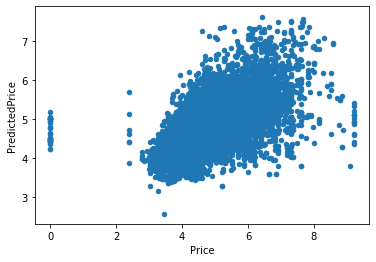

In [58]:
pd.DataFrame({'Price': y_test, 'PredictedPrice': pred_lr}).plot.scatter(x='Price', y='PredictedPrice')

In [59]:
#Lasso Regression 
lasso = Lasso()
grid = { 
    'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])
}
CV_lasso = GridSearchCV(estimator=lasso, scoring='neg_mean_squared_error', param_grid=grid, cv= 5)
CV_lasso.fit(X_train, y_train)
CV_lasso.best_params_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14322.473449083238, tolerance: 5.622061687024271
  positive)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_desce

{'alpha': 0.0}

In [60]:
# Ridge Regression
ridge = Ridge()
grid = { 
    'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])
}
CV_ridge = GridSearchCV(estimator=ridge, scoring='neg_mean_squared_error',param_grid=grid, cv= 5)
CV_ridge.fit(X_train, y_train)
CV_ridge.best_params_

{'alpha': 1.0}

In [61]:
#random forest
grid = { 
    'max_depth' : [3,4,5,6,7]
}
## show start time

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)
CV_rfr.best_params_

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

{'max_depth': 7}

In [62]:
#prediction

##Linear Regression
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(X_train, y_train)
lr_pred_train= lin_reg.predict(X_train)
lr_pred_test= lin_reg.predict(X_test)

#Lasso 
lasso = Lasso(alpha = 0)
lasso.fit(X_train, y_train)
lasso_pred_train= lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test) 

#Ridge 
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)  
ridge_pred_train= ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test) 

#Random Forest
rdf = RandomForestRegressor(max_depth=7)
rdf.fit(X_train, y_train) 
rdf_pred_train= rdf.predict(X_train)
rdf_pred_test = rdf.predict(X_test) 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18053.958472722705, tolerance: 7.04092004378813
  positive)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
important_features_dict = {}
for idx, val in enumerate(rdf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
for i in important_features_list:
    print(i,X.columns[i],important_features_dict[i])

4 room_type 0.5002831933685677
14 accommodates 0.21014339826084458
3 longitude 0.1518498164543009
2 latitude 0.05347035859981804
8 calculated_host_listings_count 0.031854133295119144
16 availability_30 0.022634210739382942
5 minimum_nights 0.016037109129426845
1 neighbourhood 0.005464942912971574
6 number_of_reviews 0.0016294575466585305
15 maximum_nights 0.0016055205892901287
7 reviews_per_month 0.0013329215269612866
9 number_of_reviews_ltm 0.001304888123839508
17 instant_bookable 0.0012183113648353383
10 Quarter 0.00047541751496822096
0 neighbourhood_group 0.00030535113611422063
11 host_is_superhost 0.0002490999357796362
12 host_has_profile_pic 0.00012630196649517542
13 host_identity_verified 1.5567534626085534e-05


In [64]:
def print_evaluate(Model, tt, Price, PredictedPrice):  
    mae = metrics.mean_absolute_error(Price, PredictedPrice)
    mse = metrics.mean_squared_error(Price, PredictedPrice)
    rmse = np.sqrt(metrics.mean_squared_error(Price, PredictedPrice))
    r2_square = metrics.r2_score(Price, PredictedPrice)
    print(Model+' '+tt)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [65]:
gbr = GradientBoostingRegressor(n_estimators=2000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                subsample=0.75,
                                random_state=42)  
gbr.fit(X_train, y_train)

gbr_pred_test = gbr.predict(X_test)
gbr_pred_train = gbr.predict(X_train)


In [66]:
important_features_dict = {}
for idx, val in enumerate(gbr.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
for i in important_features_list:
    print(i,X.columns[i],important_features_dict[i])

4 room_type 0.331880848469126
14 accommodates 0.2576042108969179
3 longitude 0.148303729353678
2 latitude 0.06726359425900855
8 calculated_host_listings_count 0.04233377436311417
16 availability_30 0.03517619203567579
5 minimum_nights 0.0320544126830101
0 neighbourhood_group 0.02977838939628435
1 neighbourhood 0.014342315394725157
10 Quarter 0.009741105703866385
6 number_of_reviews 0.008612129569804663
17 instant_bookable 0.006406426060187197
7 reviews_per_month 0.006163918085458592
9 number_of_reviews_ltm 0.004160089312222065
15 maximum_nights 0.003814618476999189
11 host_is_superhost 0.0018255466328339286
13 host_identity_verified 0.00036619819673273707
12 host_has_profile_pic 0.00017250111035523093


In [67]:
print_evaluate('Linear_Regression', 'test', y_test,lr_pred_test)
print_evaluate('Linear_Regression', 'train', y_train,lr_pred_train)

print_evaluate('Lasso', 'test',y_test, lasso_pred_test)
print_evaluate('Lasso', 'train',y_train, lasso_pred_train)

print_evaluate('Ridge', 'test',y_test, ridge_pred_test)
print_evaluate('Ridge', 'train',y_train, ridge_pred_train)

print_evaluate('Radnom Forest', 'test',y_test, rdf_pred_test)
print_evaluate('Radnom Forest', 'train',y_train, rdf_pred_train)

print_evaluate('grb', 'test',y_test, gbr_pred_test)
print_evaluate('grb', 'train',y_train, gbr_pred_train)

Linear_Regression test
MAE: 0.3910279705147656
MSE: 0.30930336856343904
RMSE: 0.5561504909315814
R2 Square 0.47679050075796725
__________________________________
Linear_Regression train
MAE: 0.39110713536676617
MSE: 0.30041863805781965
RMSE: 0.5481045867877952
R2 Square 0.4871704731642029
__________________________________
Lasso test
MAE: 0.3910279705147656
MSE: 0.30930336856343904
RMSE: 0.5561504909315814
R2 Square 0.47679050075796725
__________________________________
Lasso train
MAE: 0.39110713536676617
MSE: 0.30041863805781965
RMSE: 0.5481045867877952
R2 Square 0.4871704731642029
__________________________________
Ridge test
MAE: 0.391028036610404
MSE: 0.30930333505260965
RMSE: 0.5561504608040972
R2 Square 0.476790557444011
__________________________________
Ridge train
MAE: 0.39110720854787207
MSE: 0.30041863806920366
RMSE: 0.54810458679818
R2 Square 0.4871704731447699
__________________________________
Radnom Forest test
MAE: 0.34922716717470664
MSE: 0.24892070993663712
RMSE: 0.4

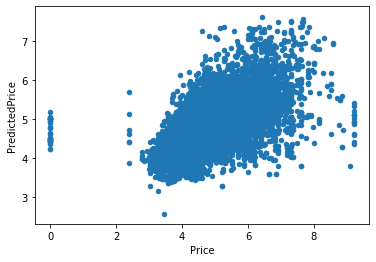

In [70]:
pd.DataFrame({'Price': y_test, 'PredictedPrice': lr_pred_test}).plot.scatter(x='Price', y='PredictedPrice')

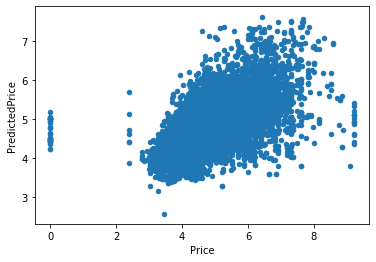

In [71]:
pd.DataFrame({'Price': y_test, 'PredictedPrice': lasso_pred_test}).plot.scatter(x='Price', y='PredictedPrice')

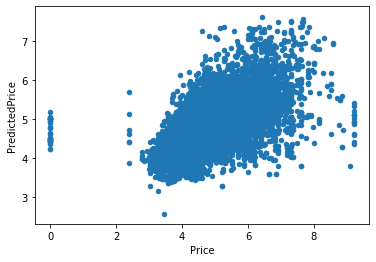

In [72]:
pd.DataFrame({'Price': y_test, 'PredictedPrice': ridge_pred_test}).plot.scatter(x='Price', y='PredictedPrice')

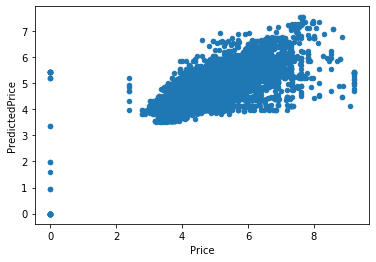

In [73]:
pd.DataFrame({'Price': y_test, 'PredictedPrice': rdf_pred_test}).plot.scatter(x='Price', y='PredictedPrice')

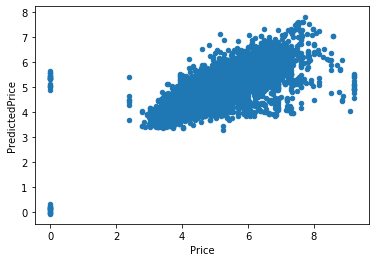

In [68]:
pd.DataFrame({'Price': y_test, 'PredictedPrice': gbr_pred_test}).plot.scatter(x='Price', y='PredictedPrice')